# Housing Prices

## Importaing all libraries

In [116]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt




%matplotlib inline 



## Reading the data 

In [117]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [118]:
Realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)
Realestate.shape

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_61133/2318822397.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  Realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)


(22213, 90)

In [119]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [120]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,...,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [121]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [122]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

## Cleaning and Tuning the dataset

In [123]:
# dropping ID column

housing.drop(columns=['PID'], inplace=True)

In [125]:
# missing Values

# show only the count of columns with null values

columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA



Columns with missing values: 27


PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageCond       129
GarageQual       129
GarageFinish     129
GarageYrBlt      129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtQual          69
BsmtCond          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
dtype: int64

In [126]:
# check correlation of missing values columns to price


corr_col = list(columns_NA.index)
corr_col.append('SalePrice')
housing[corr_col].corr()




,LotFrontage,GarageYrBlt,MasVnrArea,BsmtHalfBath,BsmtFullBath,TotalBsmtSF,BsmtUnfSF,GarageCars,GarageArea,BsmtFinSF2,BsmtFinSF1,SalePrice
LotFrontage,1.000000,0.051578,0.202139,-0.028832,0.106641,0.307885,0.104167,0.302285,0.337158,0.055247,0.177304,0.358577
GarageYrBlt,0.051578,1.000000,0.246120,-0.053576,0.174757,0.339679,0.133690,0.581007,0.554057,-0.046385,0.214492,0.520763
MasVnrArea,0.202139,0.246120,1.000000,0.002436,0.129113,0.361515,0.080283,0.348303,0.348993,-0.009519,0.277336,0.500964
BsmtHalfBath,-0.028832,-0.053576,0.002436,1.000000,-0.164064,0.000899,-0.108801,-0.029313,-0.018288,0.101400,0.067414,-0.033802
BsmtFullBath,0.106641,0.174757,0.129113,-0.164064,1.000000,0.330192,-0.383609,0.161022,0.183992,0.169453,0.632603,0.291080
TotalBsmtSF,0.307885,0.339679,0.361515,0.000899,0.330192,1.000000,0.421573,0.435333,0.465177,0.110119,0.512642,0.652222
BsmtUnfSF,0.104167,0.133690,0.080283,-0.108801,-0.383609,0.421573,1.000000,0.166081,0.149994,-0.242334,-0.480927,0.167519
GarageCars,0.302285,0.581007,0.348303,-0.029313,0.161022,0.435333,0.166081,1.000000,0.889603,-0.004548,0.261766,0.638801
GarageArea,0.337158,0.554057,0.348993,-0.018288,0.183992,0.465177,0.149994,0.889603,1.000000,0.016331,0.298309,0.634992
BsmtFinSF2,0.055247,-0.046385,-0.009519,0.101400,0.169453,0.110119,-0.242334,-0.004548,0.016331,1.000000,-0.058911,0.022520


In [127]:
# Delete Columns with Negative Correlations

housing.drop(columns=['BsmtHalfBath'], inplace=True)



# Delete top 5 columns with missing values

housing.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], inplace=True)

# Remove Columns with small correlation

housing.drop(columns=['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','LotFrontage','GarageYrBlt'], inplace=True)

In [129]:
# Fill the rest of Null. Columns with best fill based on Discription File



housing['MasVnrType'].fillna('None', inplace=True)


for i in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    housing[i].fillna('NA', inplace=True)

# Replacing small number of null value with most common value in column

housing['Electrical'].fillna(housing['Electrical'].value_counts().idxmax(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].value_counts().idxmax(), inplace=True)
housing['GarageCars'].fillna(housing['GarageCars'].value_counts().idxmax(), inplace=True)
housing['GarageArea'].fillna(housing['GarageArea'].value_counts().idxmax(), inplace=True)
housing['TotalBsmtSF'].fillna(housing['TotalBsmtSF'].value_counts().idxmax(), inplace=True)

# From the Data description File we see the following columns has the same values.
# Columns FireplaceQu ,BsmtQual,ExterQual ,ExterCond ,HeatingQC,BsmtCond ,GarageQual ,KitchenQual , GarageCond 
# they have the same values to decribe them :

# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage


# so we replace the cahr values with numerical and NA with 0


housing['BsmtQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtQual'].fillna(0, inplace=True)

housing['ExterQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterQual'].fillna(0, inplace=True)

housing['ExterCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterCond'].fillna(0, inplace=True)

housing['HeatingQC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['HeatingQC'].fillna(0, inplace=True)

housing['BsmtCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtCond'].fillna(0, inplace=True)

housing['GarageQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageQual'].fillna(0, inplace=True)

housing['KitchenQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['KitchenQual'].fillna(0, inplace=True)

housing['GarageCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageCond'].fillna(0, inplace=True)




In [130]:
columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA



Columns with missing values: 0


Series([], dtype: int64)

In [137]:
print("New Data set shape is : ",housing.shape)
print("\n\n")


housing.info()




New Data set shape is :  (2580, 68)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   SalePrice      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotArea        2580 non-null   int64  
 5   Street         2580 non-null   object 
 6   LotShape       2580 non-null   object 
 7   LandContour    2580 non-null   object 
 8   Utilities      2580 non-null   object 
 9   LotConfig      2580 non-null   object 
 10  LandSlope      2580 non-null   object 
 11  Neighborhood   2580 non-null   object 
 12  Condition1     2580 non-null   object 
 13  Condition2     2580 non-null   object 
 14  BldgType       2580 non-null   object 
 15  HouseStyle     2580 non-null   object 
 16  OverallQual    2580 non-null   int64  
 17  OverallCond   

In [138]:
# Save new cleaned data

housing.to_csv('Housing_cleaned.csv')

## Visualizing the dataset

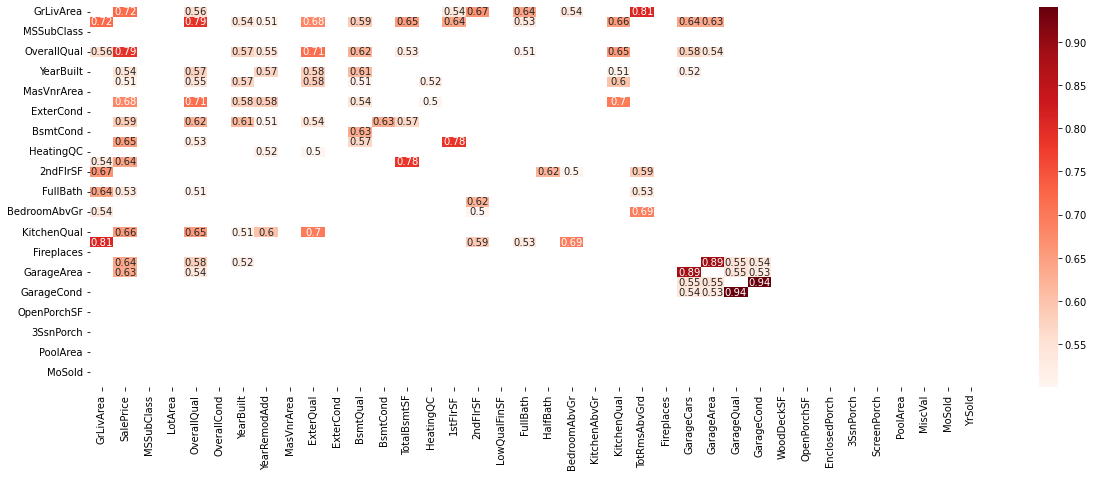

In [229]:
# Correlation Heat Map for column correlated with ratio >0.5


ColCorr = housing.corr()[((housing.corr() >= .5) ) & (housing.corr() !=1.000)]
plt.figure(figsize=(20,7))
sns.heatmap(ColCorr, annot=True, cmap="Reds")
plt.show()

In [188]:
# since the project is price oriendted we check the top columns with correlation to price

SalesCor = housing.corr(method='pearson')['SalePrice'].sort_values(ascending= False)
SalesCor[SalesCor.values > 0.6]

SalePrice      1.000000
OverallQual    0.790501
GrLivArea      0.719981
ExterQual      0.682470
KitchenQual    0.655118
TotalBsmtSF    0.652192
1stFlrSF       0.642613
GarageCars     0.638722
GarageArea     0.634669
Name: SalePrice, dtype: float64

/Users/almutasimbakathiralkindi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


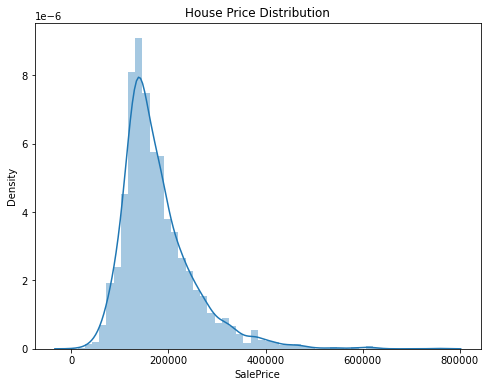

In [139]:
plt.figure(figsize=(8,6))
sns.distplot(housing['SalePrice'])
title = plt.title("House Price")

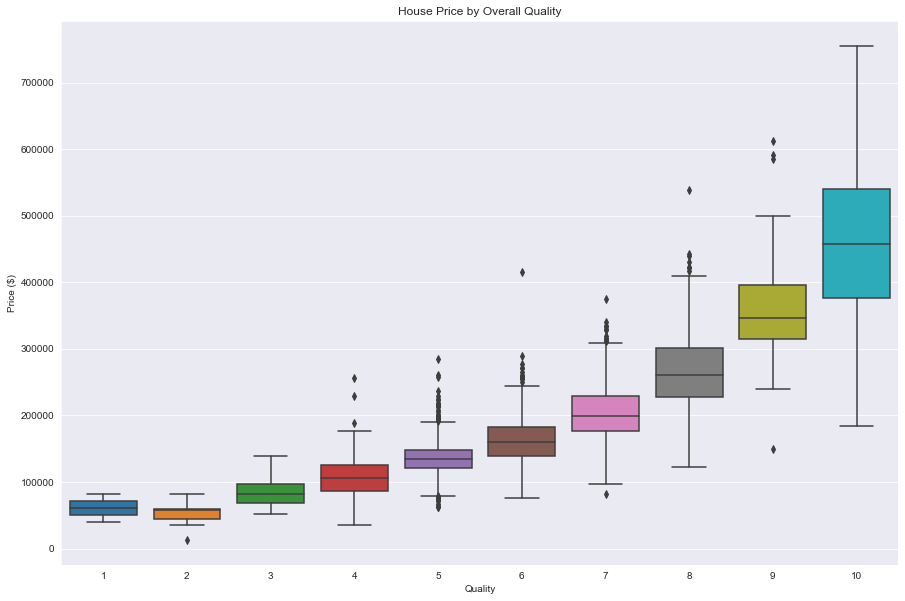

In [232]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.boxplot(x='OverallQual', y='SalePrice', data=housing).set(
    xlabel='Quality', 
    ylabel='Price ($)'
)
title = plt.title('House Price by Overall Quality')

# most important feature is over all quality , price increases with higher house quality

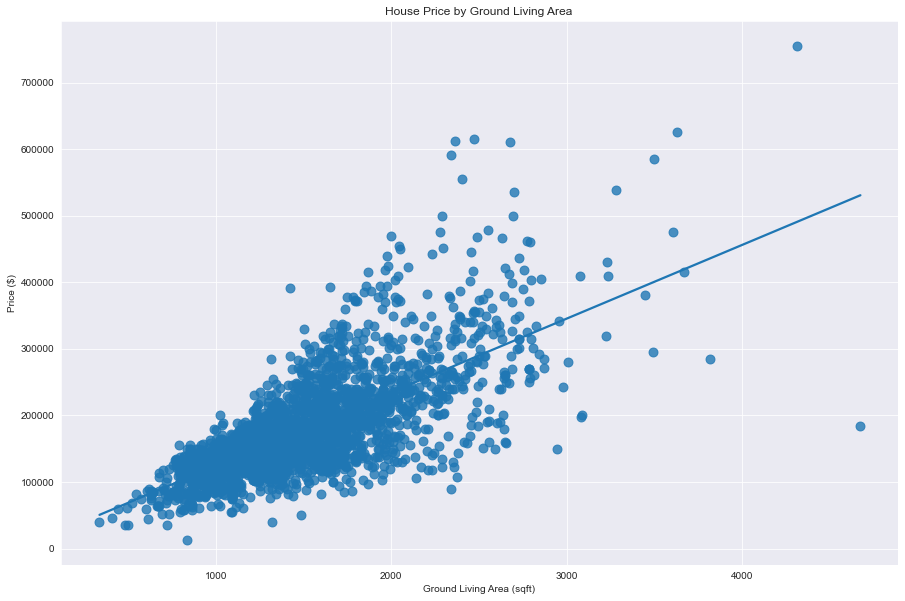

In [231]:
# Ground Living Area


sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.regplot(x="GrLivArea", y="SalePrice",data=housing ,ci=None, scatter_kws={"s": 80}).set(
    xlabel='Ground Living Area (sqft) ', 
    ylabel='Price ($)'
)
title = plt.title('House Price by Ground Living Area ')

# some outliers when GrlivArea > 4000
